While editing this notebook, don't change cell types as that confuses the autograder.

Before you turn this notebook in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

In [1]:
NAME = "Ishan Ranjan"

_Understanding Deep Learning_

---

<a href="https://colab.research.google.com/github/DL4DS/sp2024_notebooks/blob/main/release/nbs10/10_4_Downsampling_and_Upsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 10.4: Downsampling and Upsampling

This notebook investigates the down sampling and downsampling methods discussed in section 10.4 of the book.

Adapted from notebooks at https://github.com/udlbook/udlbook.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import asarray

In [3]:
# Define 4 by 4 original patch
orig_4_4 = np.array([[1, 3, 5,3 ], [6,2,0,8], [4,6,1,4], [2,8,0,3]])
print(orig_4_4)

[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]


In [10]:
def subsample(x_in):
  x_out = np.zeros(( int(np.ceil(x_in.shape[0]/2)), int(np.ceil(x_in.shape[1]/2)) ))
  # TO DO -- write the subsampling routine

  for i in range(0, x_in.shape[0], 2):
      for j in range(0, x_in.shape[1], 2):
          x_out[i//2, j//2] = x_in[i, j]

  return x_out

In [11]:
print("Original:")
print(orig_4_4)
print("Subsampled:")
print(subsample(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Subsampled:
[[1. 5.]
 [4. 1.]]


In [12]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function subsample.


Let's try that on an image to get a feel for how it works:

In [13]:
import requests
import os

# check if image already exists and then download if it doesn't
if not os.path.exists('test_image.png'):
  url = 'https://raw.githubusercontent.com/udlbook/udlbook/main/Notebooks/Chap10/test_image.png'
  response = requests.get(url)

  # Make sure the download was successful
  response.raise_for_status()

  # Write the content of the response to a file
  with open('test_image.png', 'wb') as f:
      f.write(response.content)


Image data shape: (279, 300)


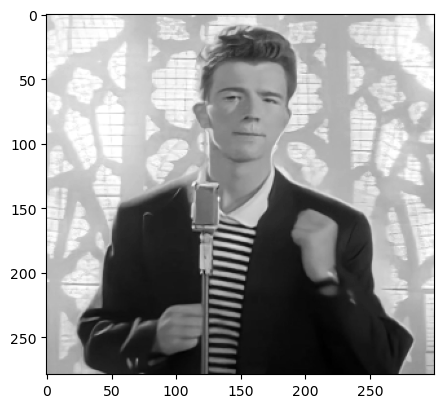

Subsampled data shape: (140, 150)


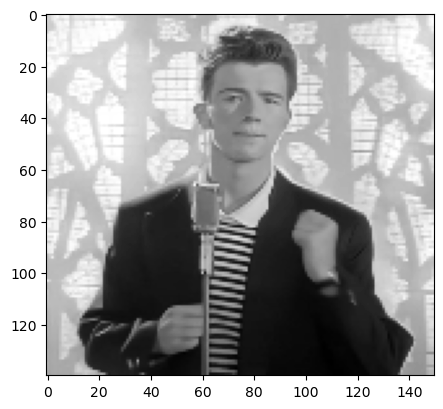

Subsampled data shape: (70, 75)


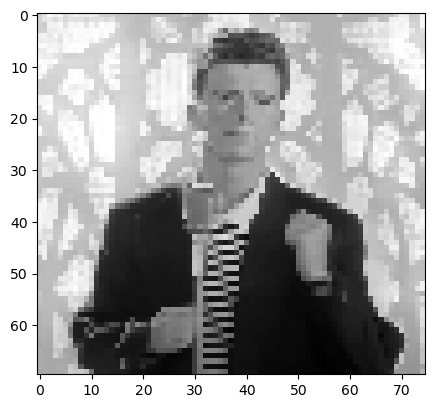

Subsampled data shape: (35, 38)


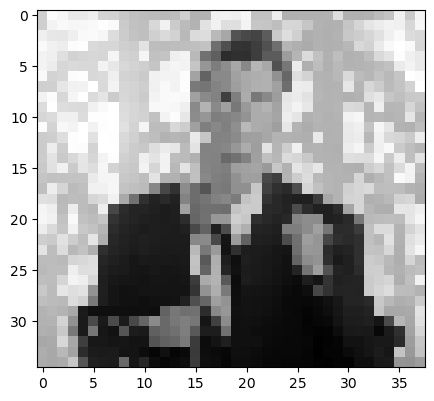

In [33]:
# load the image
image = Image.open('test_image.png')
# convert image to numpy array
data = asarray(image)
print('Image data shape:', data.shape)

data_subsample = subsample(data)

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print('Subsampled data shape:', data_subsample.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_subsample, cmap='gray')
plt.show()

data_subsample2 = subsample(data_subsample)
print('Subsampled data shape:', data_subsample2.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_subsample2, cmap='gray')
plt.show()

data_subsample3 = subsample(data_subsample2)

print('Subsampled data shape:', data_subsample3.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

As a bit of an aside. The person in the image is 80s pop star [Rick Astley](https://en.wikipedia.org/wiki/Rick_Astley).
He became popular again as part of an internet meme called [Rickrolling](https://en.wikipedia.org/wiki/Rickrolling).

In [38]:
# Now let's try max-pooling

def maxpool(x_in):
  x_out = np.zeros((int(np.ceil(x_in.shape[0] / 2)), int(np.ceil(x_in.shape[1] / 2))))

  for i in range(0, x_in.shape[0] - 1, 2):
    for j in range(0, x_in.shape[1] - 1, 2):
      x_out[i // 2, j // 2] = np.max(x_in[i:i + 2, j:j + 2])

  # Handle the last row/column if the input shape is odd
  if x_in.shape[0] % 2 != 0:
    x_out[-1, :] = np.max(x_in[-1:, :], axis=1)
  if x_in.shape[1] % 2 != 0:
    x_out[:, -1] = np.max(x_in[:, -1:], axis=0)

  return x_out


In [39]:
print("Original:")
print(orig_4_4)
print("Maxpooled:")
print(maxpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Maxpooled:
[[6. 8.]
 [8. 4.]]


In [40]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function maxpool.


Data shape: (279, 300)


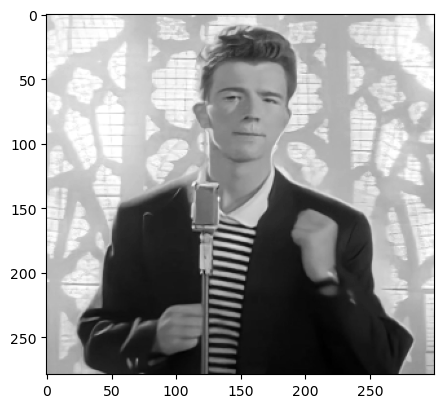

Maxpooled data shape: (140, 150)


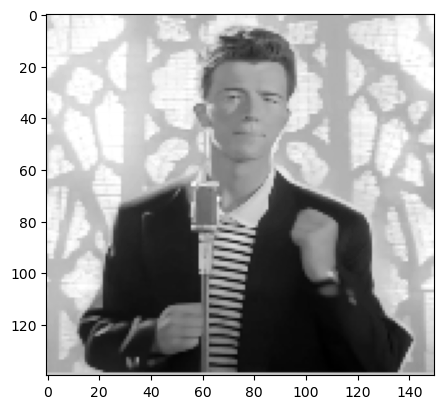

Maxpooled data shape: (70, 75)


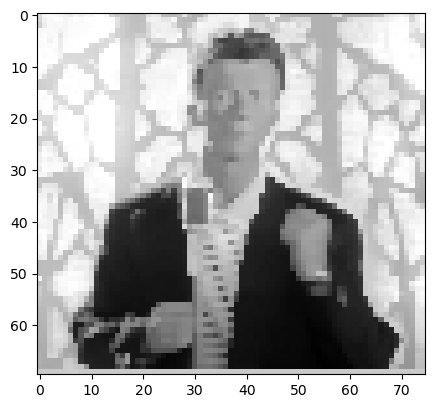

Maxpooled data shape: (35, 38)


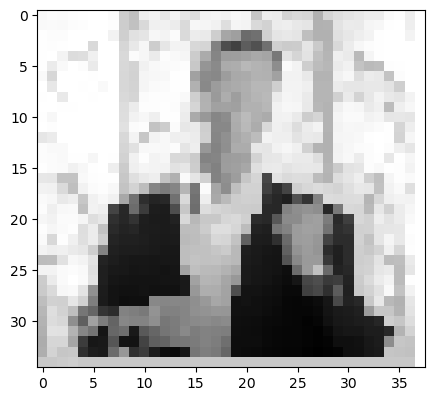

In [41]:
# Let's see what Rick looks like:
data_maxpool = maxpool(data)

print('Data shape:', data.shape)
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print('Maxpooled data shape:', data_maxpool.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool, cmap='gray')
plt.show()

data_maxpool2 = maxpool(data_maxpool)
print('Maxpooled data shape:', data_maxpool2.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool2, cmap='gray')
plt.show()

data_maxpool3 = maxpool(data_maxpool2)
print('Maxpooled data shape:', data_maxpool3.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

You can see that the stripes on his shirt gradually turn to white because we keep retaining the brightest local pixels.

In [50]:
def meanpool(x_in):
  x_out = np.zeros((int(np.ceil(x_in.shape[0] / 2)), int(np.ceil(x_in.shape[1] / 2))))

  for i in range(0, x_in.shape[0] - 1, 2):
    for j in range(0, x_in.shape[1] - 1, 2):
      x_out[i // 2, j // 2] = np.mean(x_in[i:i + 2, j:j + 2])

  # Handle the last row/column if the input shape is odd
  if x_in.shape[0] % 2 != 0:
    x_out[-1, :] = np.mean(x_in[-1:, :], axis=1)
  if x_in.shape[1] % 2 != 0:
    x_out[:, -1] = np.mean(x_in[:, -1:], axis=0)

  return x_out

In [51]:
print("Original:")
print(orig_4_4)
print("Meanpooled:")
print(meanpool(orig_4_4))

Original:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Meanpooled:
[[3. 4.]
 [5. 2.]]


In [52]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function meanpool.


Data shape: (279, 300)


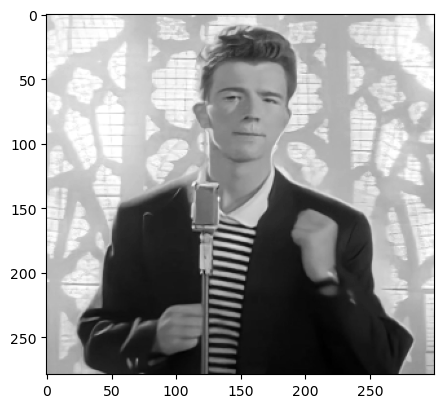

Meanpooled data shape: (140, 150)


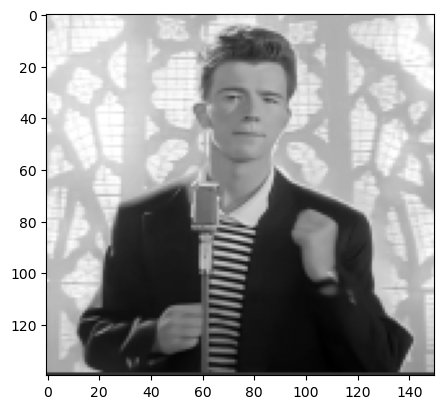

Meanpooled data shape: (70, 75)


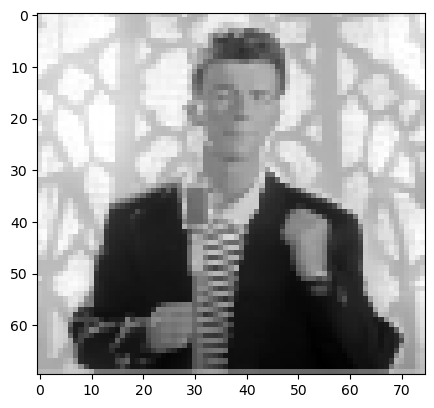

Meanpooled data shape: (35, 38)


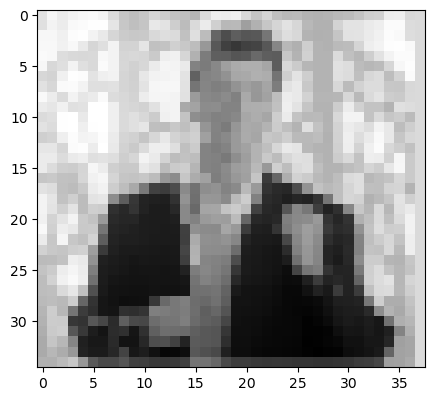

In [53]:
# Let's see what Rick looks like:
data_meanpool = meanpool(data);

print('Data shape:', data.shape)
plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print('Meanpooled data shape:', data_meanpool.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_meanpool, cmap='gray')
plt.show()

data_meanpool2 = meanpool(data_maxpool)
print('Meanpooled data shape:', data_meanpool2.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool2, cmap='gray')
plt.show()

data_meanpool3 = meanpool(data_meanpool2)
print('Meanpooled data shape:', data_meanpool3.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

Notice that the three low resolution images look quite different. <br>

Now let's upscale them again

In [54]:
# Define 2 by 2 original patch
orig_2_2 = np.array([[2, 4], [4,8]])
print(orig_2_2)

[[2 4]
 [4 8]]


In [55]:
# Let's first use the duplication method
def duplicate(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  
  # Let's first use the duplication method  
  for i in range(x_in.shape[0]):
      for j in range(x_in.shape[1]):
          x_out[i * 2, j * 2] = x_in[i, j]
          x_out[i * 2 + 1, j * 2] = x_in[i, j]
          x_out[i * 2, j * 2 + 1] = x_in[i, j]
          x_out[i * 2 + 1, j * 2 + 1] = x_in[i, j]
  
  return x_out

In [56]:
print("Original:")
print(orig_2_2)
print("Duplicated:")
print(duplicate(orig_2_2))

Original:
[[2 4]
 [4 8]]
Duplicated:
[[2. 2. 4. 4.]
 [2. 2. 4. 4.]
 [4. 4. 8. 8.]
 [4. 4. 8. 8.]]


In [57]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function duplicate.


Data shape: (35, 38)


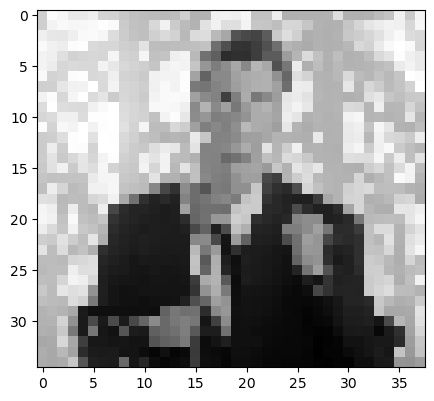

Duplicated data shape: (70, 76)


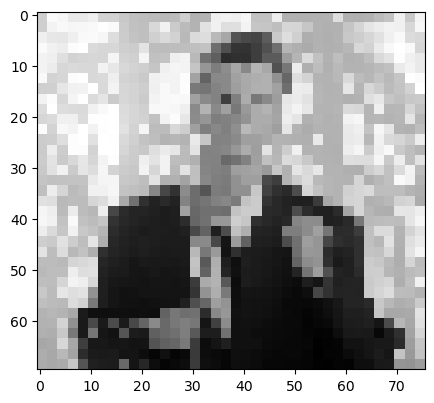

Duplicated data shape: (140, 152)


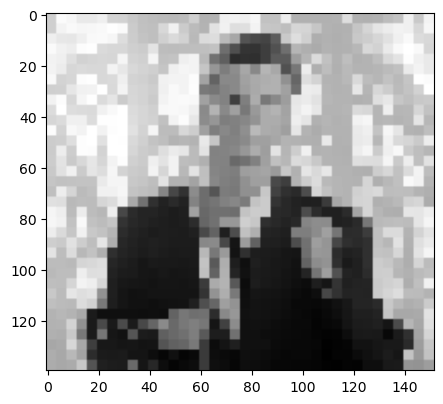

Duplicated data shape: (280, 304)


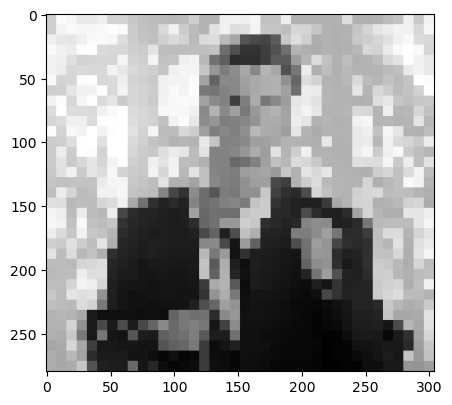

In [58]:
# Let's re-upsample, sub-sampled rick
data_duplicate = duplicate(data_subsample3);

print('Data shape:', data_subsample3.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_subsample3, cmap='gray')
plt.show()

print('Duplicated data shape:', data_duplicate.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_duplicate, cmap='gray')
plt.show()

data_duplicate2 = duplicate(data_duplicate)
print('Duplicated data shape:', data_duplicate2.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate2, cmap='gray')
plt.show()

data_duplicate3 = duplicate(data_duplicate2)
print('Duplicated data shape:', data_duplicate3.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_duplicate3, cmap='gray')
plt.show()

They look the same, but if you look at the axes, you'll see that the pixels are just duplicated.

In [184]:
# Now let's try max pooling back up
# The input x_high_res is the original high res image, from which you can deduce the position of the maximum index

def max_unpool(x_in, x_high_res):
    x_out = np.zeros((x_in.shape[0] * 2, x_in.shape[1] * 2))
    if x_high_res.shape[0] != x_in.shape[0] * 2 or x_high_res.shape[1] != x_in.shape[1] * 2:
        x_high_res = np.pad(x_high_res, ((0, x_in.shape[0]), (0, x_in.shape[1])), mode='constant')
        
        # Rest of the code...

    for i in range(x_in.shape[0]):
        for j in range(x_in.shape[1]):
            max_index = np.argmax(x_high_res[i * 2:i * 2 + 2, j * 2:j * 2 + 2])
            max_row = max_index // 2
            max_col = max_index % 2
            if i * 2 + max_row < x_out.shape[0] and j * 2 + max_col < x_out.shape[1]:
                x_out[i * 2 + max_row, j * 2 + max_col] = x_in[i, j]

    # Handle the last row/column if the input shape is odd
    if x_in.shape[0] % 2 != 0:
        for j in range(x_in.shape[1]):
            if x_high_res[-1, j * 2:j * 2 + 2].size > 0 and x_out.shape[0] > x_in.shape[0] * 2:
                max_index = np.argmax(x_high_res[-1, j * 2:j * 2 + 2])
                max_col = max_index % 2
                x_out[-1, j * 2 + max_col] = x_in[-1, j]

    if x_in.shape[1] % 2 != 0:
        for i in range(x_in.shape[0]):
            if x_high_res[i * 2:i * 2 + 2, -1].size > 0 and x_out.shape[1] > x_in.shape[1] * 2:
                max_index = np.argmax(x_high_res[i * 2:i * 2 + 2, -1])
                max_row = max_index // 2
                x_out[i * 2 + max_row, -1] = x_in[i, -1]

    return x_out

  

In [185]:
print("Original 4x4:")
print(orig_4_4)
print("Original:")
print(orig_2_2)
print("Max unpooled:")
print(max_unpool(orig_2_2,orig_4_4))

Original 4x4:
[[1 3 5 3]
 [6 2 0 8]
 [4 6 1 4]
 [2 8 0 3]]
Original:
[[2 4]
 [4 8]]
Max unpooled:
[[0. 0. 0. 0.]
 [2. 0. 0. 4.]
 [0. 0. 0. 8.]
 [0. 4. 0. 0.]]


In [186]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function max_unpool.


Data shape: (35, 38)


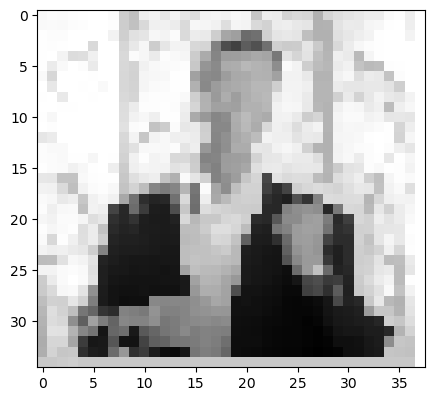

Max unpooled data shape: (70, 76)


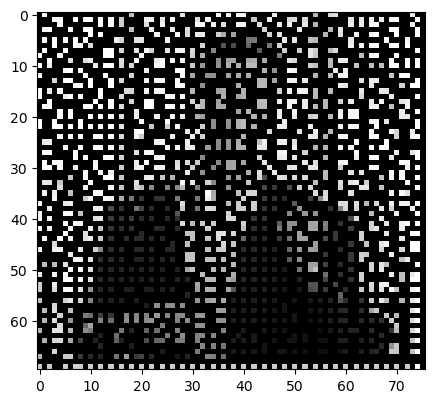

Max unpooled data shape: (140, 152)


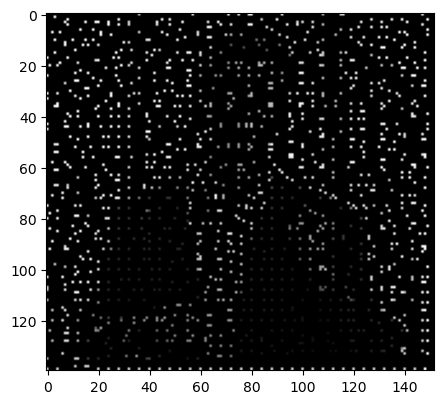

Max unpooled data shape: (280, 304)


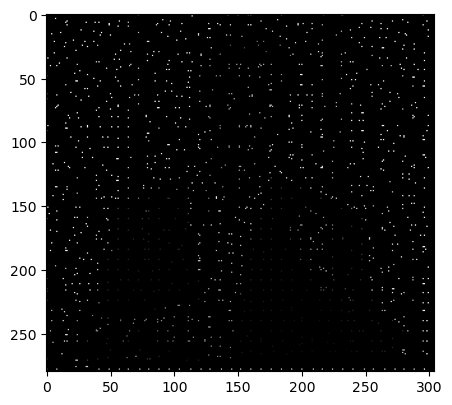

In [187]:
# Let's re-upsample, sub-sampled rick
data_max_unpool= max_unpool(data_maxpool3,data_maxpool2);

print('Data shape:', data_maxpool3.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_maxpool3, cmap='gray')
plt.show()

print('Max unpooled data shape:', data_max_unpool.shape)
plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool, cmap='gray')
plt.show()

data_max_unpool2 = max_unpool(data_max_unpool, data_maxpool)
print('Max unpooled data shape:', data_max_unpool2.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool2, cmap='gray')
plt.show()

data_max_unpool3 = max_unpool(data_max_unpool2, data)
print('Max unpooled data shape:', data_max_unpool3.shape)

plt.figure(figsize=(5,5))
plt.imshow(data_max_unpool3, cmap='gray')
plt.show()

Finally, we'll try upsampling using bilinear interpolation.  We'll treat the positions off the image as zeros by padding the original image and round fractional values upwards using np.ceil()

In [119]:
def bilinear(x_in):
  x_out = np.zeros(( x_in.shape[0]*2, x_in.shape[1]*2 ))
  x_in_pad = np.zeros((x_in.shape[0]+1, x_in.shape[1]+1))
  x_in_pad[0:x_in.shape[0],0:x_in.shape[1]] = x_in
  # TO DO -- write the duplication routine

  
  for i in range(x_in.shape[0] - 1):
    for j in range(x_in.shape[1] - 1):
      x_out[i * 2, j * 2] = x_in[i, j]
      x_out[i * 2 + 1, j * 2] = (x_in[i, j] + x_in[i + 1, j]) / 2
      x_out[i * 2, j * 2 + 1] = (x_in[i, j] + x_in[i, j + 1]) / 2
      x_out[i * 2 + 1, j * 2 + 1] = (x_in[i, j] + x_in[i + 1, j] + x_in[i, j + 1] + x_in[i + 1, j + 1]) / 4
  
  return x_out


In [120]:
print("Original:")
print(orig_2_2)
print("Bilinear:")
print(bilinear(orig_2_2))

Original:
[[2 4]
 [4 8]]
Bilinear:
[[2.  3.  0.  0. ]
 [3.  4.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


In [121]:
# Don't modify this cell.
# Hidden tests will check the outputs of the function bilinear.


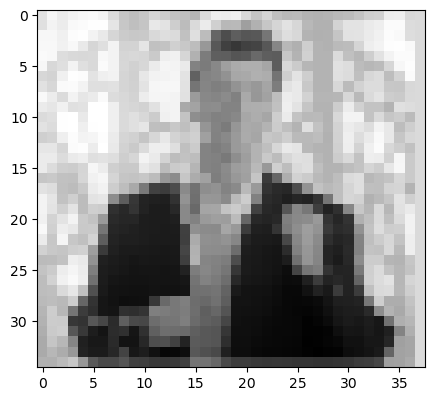

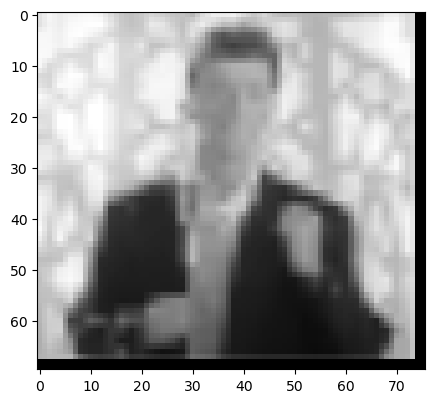

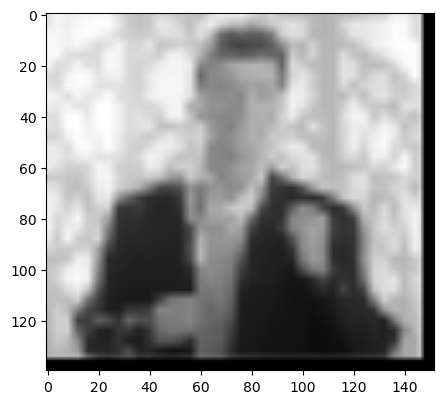

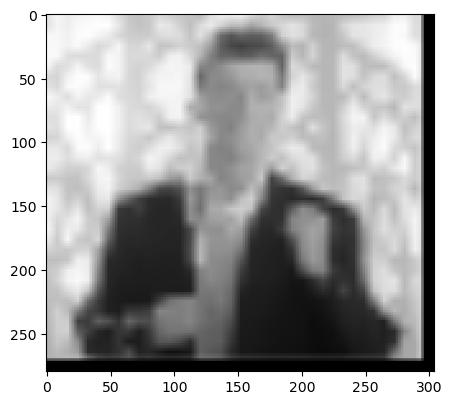

In [122]:
# Let's re-upsample, sub-sampled rick
data_bilinear = bilinear(data_meanpool3);

plt.figure(figsize=(5,5))
plt.imshow(data_meanpool3, cmap='gray')
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(data_bilinear, cmap='gray')
plt.show()

data_bilinear2 = bilinear(data_bilinear)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear2, cmap='gray')
plt.show()

data_bilinear3 = duplicate(data_bilinear2)
plt.figure(figsize=(5,5))
plt.imshow(data_bilinear3, cmap='gray')
plt.show()

All done!